In [2]:
### simple example

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:]
y = iris.target


In [3]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [5]:
# visualising the decision tree

from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file= "iris_tree.dot",
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)


In [6]:
# # converting it into a png
# ! dot -Tpng iris_tree.dot -o iris_tree.png

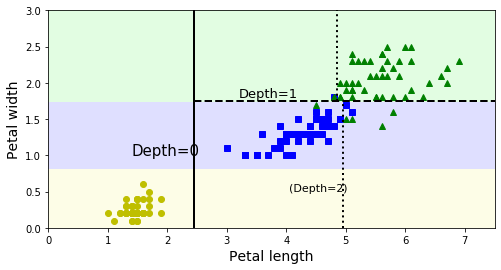

In [18]:
# plotting decision tree boundary
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0,7.5, 0, 3],
                          iris=True, legend=False,
                          plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(["#7d7d58", "#4c4c7f", "#507d50"])
        plt.contour(x1, x2, y_pred,cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:,0][y==0], X[:,1][y==0], "yo",label="Iris-Setosa" )
        plt.plot(X[:,0][y==1], X[:,1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:,0][y==2], X[:,1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else :
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(fontsize=14)

plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf, X,y)
plt.plot([2.45,2.45],[0,3], "k-", linewidth=2)
plt.plot([2.45,7.5],[1.75,1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0,1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40,1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()


In [12]:
#printing class probability
print(tree_clf.predict_proba([[5,1.5]]),
tree_clf.predict([[5,1.5]]))

[[0.         0.90740741 0.09259259]] [1]


In [14]:
### Sensitivity t training setdetails

X[(X[:,1] == X[:,1][y==1].max()) & (y==1)]

array([[4.8, 1.8]])

In [15]:
not_widest_versicolor = (X[:,1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

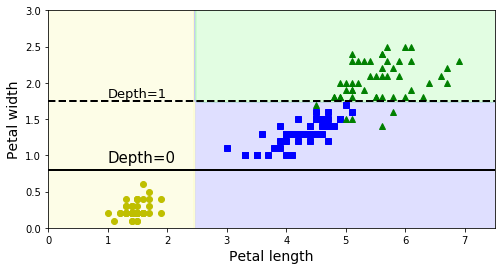

In [16]:
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0,7.5], [0.8,0.8], "k-", linewidth=2)
plt.plot([0,7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0,0.9, "Depth=0", fontsize=15)
plt.text(1.0,1.80, "Depth=1", fontsize=13)

plt.show()

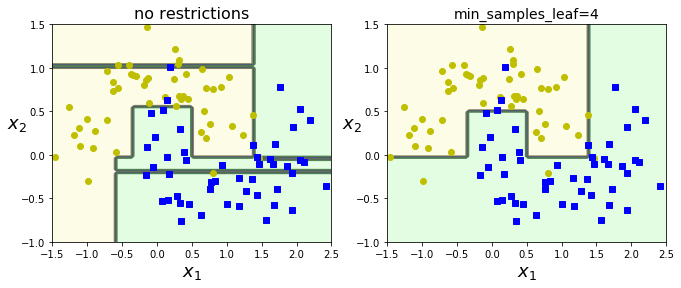

In [20]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=42 )

deep_tree_clf1 =DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym , axes=[-1.5, 2.5,-1,1.5], iris=False)
plt.title("no restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym , axes=[-1.5,2.5,-1,1.5], iris=False)
plt.title("min_samples_leaf={}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()